In [1]:
import gym
import numpy as np
import pandas as pd
from stable_baselines3 import DDPG
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
from StockTrade import StockTrade
import os
import gym
import matplotlib.pyplot as plt
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize

from stable_baselines3.common import results_plotter
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3 import HER, DDPG, DQN, SAC, TD3
from stable_baselines3.her.goal_selection_strategy import GoalSelectionStrategy
from stable_baselines3.common.bit_flipping_env import BitFlippingEnv
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.vec_env.obs_dict_wrapper import ObsDictWrapper

In [2]:
class SaveOnBestTrainingRewardCallback(BaseCallback):
    """
    Callback for saving a model (the check is done every ``check_freq`` steps)
    based on the training reward (in practice, we recommend using ``EvalCallback``).

    :param check_freq: (int)
    :param log_dir: (str) Path to the folder where the model will be saved.
      It must contains the file created by the ``Monitor`` wrapper.
    :param verbose: (int)
    """
    def __init__(self, check_freq: int, log_dir: str, verbose=1):
        super(SaveOnBestTrainingRewardCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.log_dir = log_dir
        self.save_path = os.path.join(log_dir, 'best_model')
        self.best_mean_reward = -np.inf

    def _init_callback(self) -> None:
        # Create folder if needed
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self) -> bool:
        if self.n_calls % self.check_freq == 0:

          # Retrieve training reward
          x, y = ts2xy(load_results(self.log_dir), 'timesteps')
          if len(x) > 0:
              # Mean training reward over the last 100 episodes
              mean_reward = np.mean(y[-100:])
              if self.verbose > 0:
                print("Num timesteps: {}".format(self.num_timesteps))
                print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(self.best_mean_reward, mean_reward))

              # New best model, you could save the agent here
              if mean_reward > self.best_mean_reward:
                  self.best_mean_reward = mean_reward
                  # Example for saving best model
                  if self.verbose > 0:
                    print("Saving new best model to {}".format(self.save_path))
                  self.model.save(self.save_path)

        return True

In [3]:
log_dir = "tmp/"
os.makedirs(log_dir, exist_ok=True)

In [4]:
env_raw = StockTrade(stock_quantity=1, change_stocks=False)
env = Monitor(env_raw, log_dir)

In [ ]:
# The noise objects for DDPG
n_actions = env.action_space.shape
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = TD3('MlpPolicy', env, action_noise=action_noise, verbose=1)
callback = SaveOnBestTrainingRewardCallback(check_freq=2500, log_dir=log_dir)
timesteps = 2e5

model.learn(total_timesteps=int(timesteps), callback=callback)
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "Stock Trade Game")
plt.show()
model.save("123Automator")

In [5]:
# The noise objects for DDPG
n_actions = env.action_space.shape
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = DDPG('MlpPolicy', env, action_noise=action_noise, verbose=1)
callback = SaveOnBestTrainingRewardCallback(check_freq=2500, log_dir=log_dir)
timesteps = 2e5

model.learn(total_timesteps=int(timesteps), callback=callback)
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "Stock Trade Game")
plt.show()
model.save("123Automator")

Using cuda device
Wrapping the env in a DummyVecEnv.
Num timesteps: 2500
Best mean reward: -inf - Last mean reward per episode: 357.69
Saving new best model to tmp/best_model
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 760      |
|    ep_rew_mean     | 447      |
| time/              |          |
|    episodes        | 4        |
|    fps             | 68       |
|    time_elapsed    | 44       |
|    total timesteps | 3042     |
| train/             |          |
|    actor_loss      | 4.83e+03 |
|    critic_loss     | 1.37e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 2043     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 394      |
|    ep_rew_mean     | 218      |
| time/              |          |
|    episodes        | 8        |
|    fps             | 47       |
|    time_elapsed    | 66       |
|    total timesteps | 3149     |
| train/ 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 67.4     |
|    ep_rew_mean     | 16.7     |
| time/              |          |
|    episodes        | 68       |
|    fps             | 46       |
|    time_elapsed    | 98       |
|    total timesteps | 4586     |
| train/             |          |
|    actor_loss      | 3.78e+03 |
|    critic_loss     | 2.89e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 4555     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 65       |
|    ep_rew_mean     | 15.2     |
| time/              |          |
|    episodes        | 72       |
|    fps             | 46       |
|    time_elapsed    | 100      |
|    total timesteps | 4677     |
| train/             |          |
|    actor_loss      | 3.7e+03  |
|    critic_loss     | 2.51e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 4658     |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.8     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 132      |
|    fps             | 46       |
|    time_elapsed    | 131      |
|    total timesteps | 6075     |
| train/             |          |
|    actor_loss      | 3.18e+03 |
|    critic_loss     | 2.69e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 6049     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 136      |
|    fps             | 46       |
|    time_elapsed    | 132      |
|    total timesteps | 6148     |
| train/             |          |
|    actor_loss      | 3.05e+03 |
|    critic_loss     | 3.33e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 6131     |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 196      |
|    fps             | 46       |
|    time_elapsed    | 162      |
|    total timesteps | 7547     |
| train/             |          |
|    actor_loss      | 2.67e+03 |
|    critic_loss     | 2.15e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 7524     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 200      |
|    fps             | 46       |
|    time_elapsed    | 164      |
|    total timesteps | 7652     |
| train/             |          |
|    actor_loss      | 2.69e+03 |
|    critic_loss     | 2.4e+05  |
|    learning_rate   | 0.001    |
|    n_updates       | 7617     |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 264      |
|    fps             | 46       |
|    time_elapsed    | 196      |
|    total timesteps | 9128     |
| train/             |          |
|    actor_loss      | 2.29e+03 |
|    critic_loss     | 3.15e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 9098     |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.5     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 268      |
|    fps             | 46       |
|    time_elapsed    | 198      |
|    total timesteps | 9231     |
| train/             |          |
|    actor_loss      | 2.16e+03 |
|    critic_loss     | 3.12e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 9211     |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 328      |
|    fps             | 46       |
|    time_elapsed    | 226      |
|    total timesteps | 10570    |
| train/             |          |
|    actor_loss      | 1.86e+03 |
|    critic_loss     | 4.92e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 10539    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 332      |
|    fps             | 46       |
|    time_elapsed    | 228      |
|    total timesteps | 10659    |
| train/             |          |
|    actor_loss      | 1.78e+03 |
|    critic_loss     | 3.16e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 10634    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 396      |
|    fps             | 46       |
|    time_elapsed    | 260      |
|    total timesteps | 12125    |
| train/             |          |
|    actor_loss      | 1.42e+03 |
|    critic_loss     | 1.26e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 12099    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 400      |
|    fps             | 46       |
|    time_elapsed    | 262      |
|    total timesteps | 12206    |
| train/             |          |
|    actor_loss      | 1.39e+03 |
|    critic_loss     | 1.52e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 12189    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 460      |
|    fps             | 46       |
|    time_elapsed    | 293      |
|    total timesteps | 13600    |
| train/             |          |
|    actor_loss      | 1.06e+03 |
|    critic_loss     | 1.29e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 13585    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 464      |
|    fps             | 46       |
|    time_elapsed    | 295      |
|    total timesteps | 13686    |
| train/             |          |
|    actor_loss      | 928      |
|    critic_loss     | 1.42e+05 |
|    learning_rate   | 0.001    |
|    n_updates       | 13656    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 524      |
|    fps             | 46       |
|    time_elapsed    | 325      |
|    total timesteps | 15115    |
| train/             |          |
|    actor_loss      | 807      |
|    critic_loss     | 4.83e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 15093    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 528      |
|    fps             | 46       |
|    time_elapsed    | 327      |
|    total timesteps | 15221    |
| train/             |          |
|    actor_loss      | 715      |
|    critic_loss     | 8.81e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 15190    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 592      |
|    fps             | 46       |
|    time_elapsed    | 359      |
|    total timesteps | 16695    |
| train/             |          |
|    actor_loss      | 571      |
|    critic_loss     | 3.77e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 16679    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 596      |
|    fps             | 46       |
|    time_elapsed    | 361      |
|    total timesteps | 16791    |
| train/             |          |
|    actor_loss      | 629      |
|    critic_loss     | 7.29e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 16763    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 656      |
|    fps             | 46       |
|    time_elapsed    | 392      |
|    total timesteps | 18228    |
| train/             |          |
|    actor_loss      | 456      |
|    critic_loss     | 1.43e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 18197    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.5     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 660      |
|    fps             | 46       |
|    time_elapsed    | 394      |
|    total timesteps | 18310    |
| train/             |          |
|    actor_loss      | 452      |
|    critic_loss     | 1.34e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 18293    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 724      |
|    fps             | 46       |
|    time_elapsed    | 424      |
|    total timesteps | 19738    |
| train/             |          |
|    actor_loss      | 383      |
|    critic_loss     | 1.5e+04  |
|    learning_rate   | 0.001    |
|    n_updates       | 19714    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 728      |
|    fps             | 46       |
|    time_elapsed    | 426      |
|    total timesteps | 19823    |
| train/             |          |
|    actor_loss      | 433      |
|    critic_loss     | 3.18e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 19794    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22       |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 788      |
|    fps             | 46       |
|    time_elapsed    | 455      |
|    total timesteps | 21167    |
| train/             |          |
|    actor_loss      | 350      |
|    critic_loss     | 1.69e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 21137    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 792      |
|    fps             | 46       |
|    time_elapsed    | 457      |
|    total timesteps | 21269    |
| train/             |          |
|    actor_loss      | 364      |
|    critic_loss     | 1.21e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 21242    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 852      |
|    fps             | 46       |
|    time_elapsed    | 487      |
|    total timesteps | 22660    |
| train/             |          |
|    actor_loss      | 271      |
|    critic_loss     | 1.03e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 22641    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 856      |
|    fps             | 46       |
|    time_elapsed    | 489      |
|    total timesteps | 22744    |
| train/             |          |
|    actor_loss      | 279      |
|    critic_loss     | 1.29e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 22726    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 920      |
|    fps             | 46       |
|    time_elapsed    | 521      |
|    total timesteps | 24257    |
| train/             |          |
|    actor_loss      | 284      |
|    critic_loss     | 1.27e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 24232    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 924      |
|    fps             | 46       |
|    time_elapsed    | 523      |
|    total timesteps | 24340    |
| train/             |          |
|    actor_loss      | 217      |
|    critic_loss     | 1.32e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 24322    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 984      |
|    fps             | 46       |
|    time_elapsed    | 553      |
|    total timesteps | 25746    |
| train/             |          |
|    actor_loss      | 245      |
|    critic_loss     | 6.2e+03  |
|    learning_rate   | 0.001    |
|    n_updates       | 25726    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 988      |
|    fps             | 46       |
|    time_elapsed    | 555      |
|    total timesteps | 25849    |
| train/             |          |
|    actor_loss      | 276      |
|    critic_loss     | 7.3e+03  |
|    learning_rate   | 0.001    |
|    n_updates       | 25821    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1052     |
|    fps             | 46       |
|    time_elapsed    | 587      |
|    total timesteps | 27309    |
| train/             |          |
|    actor_loss      | 214      |
|    critic_loss     | 6.95e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 27292    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1056     |
|    fps             | 46       |
|    time_elapsed    | 589      |
|    total timesteps | 27402    |
| train/             |          |
|    actor_loss      | 177      |
|    critic_loss     | 9.09e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 27375    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1116     |
|    fps             | 46       |
|    time_elapsed    | 620      |
|    total timesteps | 28849    |
| train/             |          |
|    actor_loss      | 177      |
|    critic_loss     | 8.03e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 28830    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1120     |
|    fps             | 46       |
|    time_elapsed    | 622      |
|    total timesteps | 28938    |
| train/             |          |
|    actor_loss      | 197      |
|    critic_loss     | 6.12e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 28922    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1180     |
|    fps             | 46       |
|    time_elapsed    | 651      |
|    total timesteps | 30299    |
| train/             |          |
|    actor_loss      | 181      |
|    critic_loss     | 1.93e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 30277    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1184     |
|    fps             | 46       |
|    time_elapsed    | 653      |
|    total timesteps | 30371    |
| train/             |          |
|    actor_loss      | 179      |
|    critic_loss     | 1.38e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 30355    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1248     |
|    fps             | 46       |
|    time_elapsed    | 684      |
|    total timesteps | 31837    |
| train/             |          |
|    actor_loss      | 160      |
|    critic_loss     | 1.12e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 31809    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1252     |
|    fps             | 46       |
|    time_elapsed    | 686      |
|    total timesteps | 31955    |
| train/             |          |
|    actor_loss      | 176      |
|    critic_loss     | 9.73e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 31926    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.8     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1312     |
|    fps             | 46       |
|    time_elapsed    | 717      |
|    total timesteps | 33382    |
| train/             |          |
|    actor_loss      | 155      |
|    critic_loss     | 1.3e+04  |
|    learning_rate   | 0.001    |
|    n_updates       | 33351    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1316     |
|    fps             | 46       |
|    time_elapsed    | 719      |
|    total timesteps | 33467    |
| train/             |          |
|    actor_loss      | 187      |
|    critic_loss     | 1.69e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 33446    |
--------------

Num timesteps: 35000
Best mean reward: 357.69 - Last mean reward per episode: -10.22
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1380     |
|    fps             | 46       |
|    time_elapsed    | 754      |
|    total timesteps | 35057    |
| train/             |          |
|    actor_loss      | 145      |
|    critic_loss     | 4.45e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 35029    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 24.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1384     |
|    fps             | 46       |
|    time_elapsed    | 755      |
|    total timesteps | 35140    |
| train/             |          |
|    actor_loss      | 121      |
|    critic_loss     | 2.31e+04

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1444     |
|    fps             | 46       |
|    time_elapsed    | 785      |
|    total timesteps | 36506    |
| train/             |          |
|    actor_loss      | 151      |
|    critic_loss     | 5.42e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 36488    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1448     |
|    fps             | 46       |
|    time_elapsed    | 787      |
|    total timesteps | 36599    |
| train/             |          |
|    actor_loss      | 151      |
|    critic_loss     | 6.33e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 36569    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1508     |
|    fps             | 46       |
|    time_elapsed    | 816      |
|    total timesteps | 37936    |
| train/             |          |
|    actor_loss      | 104      |
|    critic_loss     | 4.23e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 37916    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.5     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1512     |
|    fps             | 46       |
|    time_elapsed    | 818      |
|    total timesteps | 38031    |
| train/             |          |
|    actor_loss      | 126      |
|    critic_loss     | 7.17e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 38007    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1576     |
|    fps             | 46       |
|    time_elapsed    | 850      |
|    total timesteps | 39514    |
| train/             |          |
|    actor_loss      | 122      |
|    critic_loss     | 3.3e+03  |
|    learning_rate   | 0.001    |
|    n_updates       | 39493    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1580     |
|    fps             | 46       |
|    time_elapsed    | 852      |
|    total timesteps | 39618    |
| train/             |          |
|    actor_loss      | 137      |
|    critic_loss     | 8.97e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 39586    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1640     |
|    fps             | 46       |
|    time_elapsed    | 882      |
|    total timesteps | 41010    |
| train/             |          |
|    actor_loss      | 128      |
|    critic_loss     | 2.48e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 40985    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1644     |
|    fps             | 46       |
|    time_elapsed    | 884      |
|    total timesteps | 41103    |
| train/             |          |
|    actor_loss      | 97.6     |
|    critic_loss     | 5.06e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 41074    |
--------------

Num timesteps: 42500
Best mean reward: 357.69 - Last mean reward per episode: -10.23
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1708     |
|    fps             | 46       |
|    time_elapsed    | 916      |
|    total timesteps | 42580    |
| train/             |          |
|    actor_loss      | 162      |
|    critic_loss     | 1.17e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 42556    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1712     |
|    fps             | 46       |
|    time_elapsed    | 918      |
|    total timesteps | 42690    |
| train/             |          |
|    actor_loss      | 110      |
|    critic_loss     | 1.3e+04 

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1772     |
|    fps             | 46       |
|    time_elapsed    | 948      |
|    total timesteps | 44041    |
| train/             |          |
|    actor_loss      | 122      |
|    critic_loss     | 7.13e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 44013    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1776     |
|    fps             | 46       |
|    time_elapsed    | 949      |
|    total timesteps | 44121    |
| train/             |          |
|    actor_loss      | 100      |
|    critic_loss     | 6.63e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 44094    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1836     |
|    fps             | 46       |
|    time_elapsed    | 981      |
|    total timesteps | 45530    |
| train/             |          |
|    actor_loss      | 142      |
|    critic_loss     | 9.22e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 45515    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1840     |
|    fps             | 46       |
|    time_elapsed    | 982      |
|    total timesteps | 45610    |
| train/             |          |
|    actor_loss      | 111      |
|    critic_loss     | 6.82e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 45591    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.8     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1904     |
|    fps             | 46       |
|    time_elapsed    | 1015     |
|    total timesteps | 47137    |
| train/             |          |
|    actor_loss      | 95.6     |
|    critic_loss     | 1.01e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 47120    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1908     |
|    fps             | 46       |
|    time_elapsed    | 1017     |
|    total timesteps | 47215    |
| train/             |          |
|    actor_loss      | 105      |
|    critic_loss     | 2.36e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 47196    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1968     |
|    fps             | 46       |
|    time_elapsed    | 1047     |
|    total timesteps | 48610    |
| train/             |          |
|    actor_loss      | 111      |
|    critic_loss     | 2.58e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 48588    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 1972     |
|    fps             | 46       |
|    time_elapsed    | 1049     |
|    total timesteps | 48717    |
| train/             |          |
|    actor_loss      | 104      |
|    critic_loss     | 9.84e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 48694    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 2032     |
|    fps             | 46       |
|    time_elapsed    | 1081     |
|    total timesteps | 50138    |
| train/             |          |
|    actor_loss      | 124      |
|    critic_loss     | 1.96e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 50115    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.5     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2036     |
|    fps             | 46       |
|    time_elapsed    | 1083     |
|    total timesteps | 50215    |
| train/             |          |
|    actor_loss      | 106      |
|    critic_loss     | 6.78e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 50198    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2100     |
|    fps             | 46       |
|    time_elapsed    | 1115     |
|    total timesteps | 51696    |
| train/             |          |
|    actor_loss      | 116      |
|    critic_loss     | 8.41e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 51678    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2104     |
|    fps             | 46       |
|    time_elapsed    | 1117     |
|    total timesteps | 51788    |
| train/             |          |
|    actor_loss      | 95       |
|    critic_loss     | 4.45e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 51773    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2164     |
|    fps             | 46       |
|    time_elapsed    | 1148     |
|    total timesteps | 53244    |
| train/             |          |
|    actor_loss      | 97.1     |
|    critic_loss     | 5.58e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 53223    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2168     |
|    fps             | 46       |
|    time_elapsed    | 1150     |
|    total timesteps | 53342    |
| train/             |          |
|    actor_loss      | 96.7     |
|    critic_loss     | 6.48e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 53321    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2232     |
|    fps             | 46       |
|    time_elapsed    | 1181     |
|    total timesteps | 54758    |
| train/             |          |
|    actor_loss      | 109      |
|    critic_loss     | 9.16e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 54727    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2236     |
|    fps             | 46       |
|    time_elapsed    | 1183     |
|    total timesteps | 54847    |
| train/             |          |
|    actor_loss      | 104      |
|    critic_loss     | 3.63e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 54823    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2296     |
|    fps             | 46       |
|    time_elapsed    | 1213     |
|    total timesteps | 56215    |
| train/             |          |
|    actor_loss      | 127      |
|    critic_loss     | 6.36e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 56186    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2300     |
|    fps             | 46       |
|    time_elapsed    | 1215     |
|    total timesteps | 56322    |
| train/             |          |
|    actor_loss      | 118      |
|    critic_loss     | 1.36e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 56291    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2360     |
|    fps             | 46       |
|    time_elapsed    | 1244     |
|    total timesteps | 57660    |
| train/             |          |
|    actor_loss      | 113      |
|    critic_loss     | 1.09e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 57624    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2364     |
|    fps             | 46       |
|    time_elapsed    | 1247     |
|    total timesteps | 57773    |
| train/             |          |
|    actor_loss      | 109      |
|    critic_loss     | 2.04e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 57743    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.5     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2428     |
|    fps             | 46       |
|    time_elapsed    | 1278     |
|    total timesteps | 59192    |
| train/             |          |
|    actor_loss      | 98.8     |
|    critic_loss     | 7.77e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 59175    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.5     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2432     |
|    fps             | 46       |
|    time_elapsed    | 1279     |
|    total timesteps | 59284    |
| train/             |          |
|    actor_loss      | 104      |
|    critic_loss     | 7.59e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 59254    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2492     |
|    fps             | 46       |
|    time_elapsed    | 1310     |
|    total timesteps | 60689    |
| train/             |          |
|    actor_loss      | 91.4     |
|    critic_loss     | 1.36e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 60673    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.8     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2496     |
|    fps             | 46       |
|    time_elapsed    | 1312     |
|    total timesteps | 60764    |
| train/             |          |
|    actor_loss      | 99.8     |
|    critic_loss     | 3.76e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 60746    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2560     |
|    fps             | 46       |
|    time_elapsed    | 1344     |
|    total timesteps | 62246    |
| train/             |          |
|    actor_loss      | 96.9     |
|    critic_loss     | 5.44e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 62216    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.8     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2564     |
|    fps             | 46       |
|    time_elapsed    | 1346     |
|    total timesteps | 62340    |
| train/             |          |
|    actor_loss      | 105      |
|    critic_loss     | 9.31e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 62321    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2624     |
|    fps             | 46       |
|    time_elapsed    | 1379     |
|    total timesteps | 63809    |
| train/             |          |
|    actor_loss      | 91.9     |
|    critic_loss     | 3.61e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 63779    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.8     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2628     |
|    fps             | 46       |
|    time_elapsed    | 1381     |
|    total timesteps | 63882    |
| train/             |          |
|    actor_loss      | 102      |
|    critic_loss     | 1.12e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 63863    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2688     |
|    fps             | 46       |
|    time_elapsed    | 1411     |
|    total timesteps | 65226    |
| train/             |          |
|    actor_loss      | 105      |
|    critic_loss     | 9.87e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 65210    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.8     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2692     |
|    fps             | 46       |
|    time_elapsed    | 1412     |
|    total timesteps | 65314    |
| train/             |          |
|    actor_loss      | 111      |
|    critic_loss     | 6.31e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 65290    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.2     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2756     |
|    fps             | 46       |
|    time_elapsed    | 1443     |
|    total timesteps | 66719    |
| train/             |          |
|    actor_loss      | 92.5     |
|    critic_loss     | 4.96e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 66700    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.3     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2760     |
|    fps             | 46       |
|    time_elapsed    | 1446     |
|    total timesteps | 66827    |
| train/             |          |
|    actor_loss      | 100      |
|    critic_loss     | 1.42e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 66799    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2820     |
|    fps             | 46       |
|    time_elapsed    | 1476     |
|    total timesteps | 68195    |
| train/             |          |
|    actor_loss      | 78.8     |
|    critic_loss     | 7.64e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 68177    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2824     |
|    fps             | 46       |
|    time_elapsed    | 1478     |
|    total timesteps | 68286    |
| train/             |          |
|    actor_loss      | 121      |
|    critic_loss     | 9.74e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 68258    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2888     |
|    fps             | 46       |
|    time_elapsed    | 1510     |
|    total timesteps | 69766    |
| train/             |          |
|    actor_loss      | 110      |
|    critic_loss     | 7.06e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 69735    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2892     |
|    fps             | 46       |
|    time_elapsed    | 1512     |
|    total timesteps | 69864    |
| train/             |          |
|    actor_loss      | 112      |
|    critic_loss     | 2.84e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 69843    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2952     |
|    fps             | 46       |
|    time_elapsed    | 1541     |
|    total timesteps | 71213    |
| train/             |          |
|    actor_loss      | 109      |
|    critic_loss     | 6.38e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 71182    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 2956     |
|    fps             | 46       |
|    time_elapsed    | 1543     |
|    total timesteps | 71304    |
| train/             |          |
|    actor_loss      | 102      |
|    critic_loss     | 4.88e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 71274    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3016     |
|    fps             | 46       |
|    time_elapsed    | 1574     |
|    total timesteps | 72695    |
| train/             |          |
|    actor_loss      | 115      |
|    critic_loss     | 3.14e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 72676    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3020     |
|    fps             | 46       |
|    time_elapsed    | 1576     |
|    total timesteps | 72790    |
| train/             |          |
|    actor_loss      | 125      |
|    critic_loss     | 1.19e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 72771    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3084     |
|    fps             | 46       |
|    time_elapsed    | 1607     |
|    total timesteps | 74268    |
| train/             |          |
|    actor_loss      | 110      |
|    critic_loss     | 7.26e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 74246    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3088     |
|    fps             | 46       |
|    time_elapsed    | 1609     |
|    total timesteps | 74359    |
| train/             |          |
|    actor_loss      | 99.5     |
|    critic_loss     | 7.33e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 74335    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3148     |
|    fps             | 46       |
|    time_elapsed    | 1639     |
|    total timesteps | 75715    |
| train/             |          |
|    actor_loss      | 107      |
|    critic_loss     | 9.38e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 75687    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3152     |
|    fps             | 46       |
|    time_elapsed    | 1641     |
|    total timesteps | 75809    |
| train/             |          |
|    actor_loss      | 97.4     |
|    critic_loss     | 6.12e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 75780    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3216     |
|    fps             | 46       |
|    time_elapsed    | 1673     |
|    total timesteps | 77271    |
| train/             |          |
|    actor_loss      | 101      |
|    critic_loss     | 1.1e+04  |
|    learning_rate   | 0.001    |
|    n_updates       | 77254    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3220     |
|    fps             | 46       |
|    time_elapsed    | 1675     |
|    total timesteps | 77370    |
| train/             |          |
|    actor_loss      | 113      |
|    critic_loss     | 7.03e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 77341    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.5     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3280     |
|    fps             | 46       |
|    time_elapsed    | 1706     |
|    total timesteps | 78777    |
| train/             |          |
|    actor_loss      | 127      |
|    critic_loss     | 3.53e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 78760    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.5     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3284     |
|    fps             | 46       |
|    time_elapsed    | 1708     |
|    total timesteps | 78873    |
| train/             |          |
|    actor_loss      | 127      |
|    critic_loss     | 6.17e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 78854    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3344     |
|    fps             | 46       |
|    time_elapsed    | 1739     |
|    total timesteps | 80306    |
| train/             |          |
|    actor_loss      | 107      |
|    critic_loss     | 8.3e+03  |
|    learning_rate   | 0.001    |
|    n_updates       | 80280    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3348     |
|    fps             | 46       |
|    time_elapsed    | 1741     |
|    total timesteps | 80400    |
| train/             |          |
|    actor_loss      | 100      |
|    critic_loss     | 4.61e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 80380    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 3412     |
|    fps             | 46       |
|    time_elapsed    | 1772     |
|    total timesteps | 81832    |
| train/             |          |
|    actor_loss      | 71.1     |
|    critic_loss     | 1.01e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 81813    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 3416     |
|    fps             | 46       |
|    time_elapsed    | 1774     |
|    total timesteps | 81940    |
| train/             |          |
|    actor_loss      | 98.1     |
|    critic_loss     | 5.98e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 81914    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3476     |
|    fps             | 46       |
|    time_elapsed    | 1804     |
|    total timesteps | 83315    |
| train/             |          |
|    actor_loss      | 98.3     |
|    critic_loss     | 1.11e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 83282    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.8     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3480     |
|    fps             | 46       |
|    time_elapsed    | 1806     |
|    total timesteps | 83402    |
| train/             |          |
|    actor_loss      | 84.5     |
|    critic_loss     | 1.96e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 83384    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.8     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3544     |
|    fps             | 46       |
|    time_elapsed    | 1839     |
|    total timesteps | 84910    |
| train/             |          |
|    actor_loss      | 101      |
|    critic_loss     | 8.38e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 84891    |
---------------------------------
Num timesteps: 85000
Best mean reward: 357.69 - Last mean reward per episode: -10.23
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3548     |
|    fps             | 46       |
|    time_elapsed    | 1841     |
|    total timesteps | 85005    |
| train/             |          |
|    actor_loss      | 143      |
|    critic_loss     | 1.91e+04

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3608     |
|    fps             | 46       |
|    time_elapsed    | 1872     |
|    total timesteps | 86408    |
| train/             |          |
|    actor_loss      | 104      |
|    critic_loss     | 4.11e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 86388    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3612     |
|    fps             | 46       |
|    time_elapsed    | 1874     |
|    total timesteps | 86520    |
| train/             |          |
|    actor_loss      | 113      |
|    critic_loss     | 6.83e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 86498    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3672     |
|    fps             | 46       |
|    time_elapsed    | 1904     |
|    total timesteps | 87909    |
| train/             |          |
|    actor_loss      | 81.3     |
|    critic_loss     | 2.52e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 87888    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3676     |
|    fps             | 46       |
|    time_elapsed    | 1907     |
|    total timesteps | 88011    |
| train/             |          |
|    actor_loss      | 101      |
|    critic_loss     | 1.13e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 87991    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3740     |
|    fps             | 46       |
|    time_elapsed    | 1940     |
|    total timesteps | 89524    |
| train/             |          |
|    actor_loss      | 98.9     |
|    critic_loss     | 3.65e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 89497    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3744     |
|    fps             | 46       |
|    time_elapsed    | 1942     |
|    total timesteps | 89617    |
| train/             |          |
|    actor_loss      | 97.7     |
|    critic_loss     | 5.48e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 89588    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3804     |
|    fps             | 46       |
|    time_elapsed    | 1972     |
|    total timesteps | 91010    |
| train/             |          |
|    actor_loss      | 99.5     |
|    critic_loss     | 4.07e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 90980    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3808     |
|    fps             | 46       |
|    time_elapsed    | 1973     |
|    total timesteps | 91098    |
| train/             |          |
|    actor_loss      | 103      |
|    critic_loss     | 1.98e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 91070    |
--------------

Num timesteps: 92500
Best mean reward: 357.69 - Last mean reward per episode: -10.22
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3872     |
|    fps             | 46       |
|    time_elapsed    | 2006     |
|    total timesteps | 92557    |
| train/             |          |
|    actor_loss      | 111      |
|    critic_loss     | 2.03e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 92541    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3876     |
|    fps             | 46       |
|    time_elapsed    | 2007     |
|    total timesteps | 92639    |
| train/             |          |
|    actor_loss      | 108      |
|    critic_loss     | 8.69e+03

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3936     |
|    fps             | 46       |
|    time_elapsed    | 2037     |
|    total timesteps | 94011    |
| train/             |          |
|    actor_loss      | 127      |
|    critic_loss     | 6.29e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 93993    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 3940     |
|    fps             | 46       |
|    time_elapsed    | 2039     |
|    total timesteps | 94106    |
| train/             |          |
|    actor_loss      | 100      |
|    critic_loss     | 3.87e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 94083    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4000     |
|    fps             | 46       |
|    time_elapsed    | 2070     |
|    total timesteps | 95472    |
| train/             |          |
|    actor_loss      | 100      |
|    critic_loss     | 4.74e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 95455    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4004     |
|    fps             | 46       |
|    time_elapsed    | 2072     |
|    total timesteps | 95580    |
| train/             |          |
|    actor_loss      | 85       |
|    critic_loss     | 1.16e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 95552    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4068     |
|    fps             | 46       |
|    time_elapsed    | 2103     |
|    total timesteps | 96986    |
| train/             |          |
|    actor_loss      | 122      |
|    critic_loss     | 7.28e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 96967    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4072     |
|    fps             | 46       |
|    time_elapsed    | 2105     |
|    total timesteps | 97086    |
| train/             |          |
|    actor_loss      | 131      |
|    critic_loss     | 1.08e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 97056    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 4132     |
|    fps             | 46       |
|    time_elapsed    | 2136     |
|    total timesteps | 98491    |
| train/             |          |
|    actor_loss      | 97.6     |
|    critic_loss     | 2.42e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 98472    |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 4136     |
|    fps             | 46       |
|    time_elapsed    | 2138     |
|    total timesteps | 98590    |
| train/             |          |
|    actor_loss      | 83.8     |
|    critic_loss     | 4.37e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 98572    |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4200     |
|    fps             | 46       |
|    time_elapsed    | 2171     |
|    total timesteps | 100094   |
| train/             |          |
|    actor_loss      | 124      |
|    critic_loss     | 1.07e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 100074   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4204     |
|    fps             | 46       |
|    time_elapsed    | 2173     |
|    total timesteps | 100184   |
| train/             |          |
|    actor_loss      | 104      |
|    critic_loss     | 1.16e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 100160   |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4268     |
|    fps             | 46       |
|    time_elapsed    | 2209     |
|    total timesteps | 101673   |
| train/             |          |
|    actor_loss      | 87.4     |
|    critic_loss     | 2.22e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 101647   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4272     |
|    fps             | 45       |
|    time_elapsed    | 2212     |
|    total timesteps | 101766   |
| train/             |          |
|    actor_loss      | 160      |
|    critic_loss     | 2.94e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 101743   |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4332     |
|    fps             | 45       |
|    time_elapsed    | 2243     |
|    total timesteps | 103099   |
| train/             |          |
|    actor_loss      | 142      |
|    critic_loss     | 8.36e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 103082   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4336     |
|    fps             | 45       |
|    time_elapsed    | 2245     |
|    total timesteps | 103189   |
| train/             |          |
|    actor_loss      | 116      |
|    critic_loss     | 8e+03    |
|    learning_rate   | 0.001    |
|    n_updates       | 103165   |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 4400     |
|    fps             | 45       |
|    time_elapsed    | 2279     |
|    total timesteps | 104732   |
| train/             |          |
|    actor_loss      | 118      |
|    critic_loss     | 6.47e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 104713   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23       |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 4404     |
|    fps             | 45       |
|    time_elapsed    | 2281     |
|    total timesteps | 104804   |
| train/             |          |
|    actor_loss      | 109      |
|    critic_loss     | 3.42e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 104786   |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 4464     |
|    fps             | 45       |
|    time_elapsed    | 2311     |
|    total timesteps | 106173   |
| train/             |          |
|    actor_loss      | 117      |
|    critic_loss     | 1.16e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 106146   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 4468     |
|    fps             | 45       |
|    time_elapsed    | 2313     |
|    total timesteps | 106259   |
| train/             |          |
|    actor_loss      | 105      |
|    critic_loss     | 8.26e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 106240   |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4528     |
|    fps             | 45       |
|    time_elapsed    | 2343     |
|    total timesteps | 107660   |
| train/             |          |
|    actor_loss      | 100      |
|    critic_loss     | 8.44e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 107624   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.9     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4532     |
|    fps             | 45       |
|    time_elapsed    | 2345     |
|    total timesteps | 107739   |
| train/             |          |
|    actor_loss      | 83.2     |
|    critic_loss     | 6.91e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 107720   |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.2     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4596     |
|    fps             | 45       |
|    time_elapsed    | 2378     |
|    total timesteps | 109227   |
| train/             |          |
|    actor_loss      | 102      |
|    critic_loss     | 5.34e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 109210   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.1     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4600     |
|    fps             | 45       |
|    time_elapsed    | 2380     |
|    total timesteps | 109311   |
| train/             |          |
|    actor_loss      | 104      |
|    critic_loss     | 5.95e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 109286   |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.3     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 4660     |
|    fps             | 45       |
|    time_elapsed    | 2411     |
|    total timesteps | 110725   |
| train/             |          |
|    actor_loss      | 108      |
|    critic_loss     | 8.11e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 110706   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 4664     |
|    fps             | 45       |
|    time_elapsed    | 2413     |
|    total timesteps | 110819   |
| train/             |          |
|    actor_loss      | 93.5     |
|    critic_loss     | 1.2e+04  |
|    learning_rate   | 0.001    |
|    n_updates       | 110794   |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.5     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4728     |
|    fps             | 45       |
|    time_elapsed    | 2446     |
|    total timesteps | 112324   |
| train/             |          |
|    actor_loss      | 89.2     |
|    critic_loss     | 7.72e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 112302   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4732     |
|    fps             | 45       |
|    time_elapsed    | 2448     |
|    total timesteps | 112417   |
| train/             |          |
|    actor_loss      | 110      |
|    critic_loss     | 9.61e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 112398   |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4792     |
|    fps             | 45       |
|    time_elapsed    | 2480     |
|    total timesteps | 113856   |
| train/             |          |
|    actor_loss      | 79.8     |
|    critic_loss     | 1.11e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 113834   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4796     |
|    fps             | 45       |
|    time_elapsed    | 2482     |
|    total timesteps | 113946   |
| train/             |          |
|    actor_loss      | 111      |
|    critic_loss     | 6.34e+03 |
|    learning_rate   | 0.001    |
|    n_updates       | 113913   |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.7     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4856     |
|    fps             | 45       |
|    time_elapsed    | 2515     |
|    total timesteps | 115296   |
| train/             |          |
|    actor_loss      | 103      |
|    critic_loss     | 1.21e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 115275   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 23.6     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4860     |
|    fps             | 45       |
|    time_elapsed    | 2517     |
|    total timesteps | 115388   |
| train/             |          |
|    actor_loss      | 120      |
|    critic_loss     | 1.02e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 115368   |
--------------

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.5     |
|    ep_rew_mean     | -10.3    |
| time/              |          |
|    episodes        | 4924     |
|    fps             | 45       |
|    time_elapsed    | 2553     |
|    total timesteps | 116827   |
| train/             |          |
|    actor_loss      | 98       |
|    critic_loss     | 1.06e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 116808   |
---------------------------------
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 22.4     |
|    ep_rew_mean     | -10.2    |
| time/              |          |
|    episodes        | 4928     |
|    fps             | 45       |
|    time_elapsed    | 2555     |
|    total timesteps | 116910   |
| train/             |          |
|    actor_loss      | 120      |
|    critic_loss     | 1.34e+04 |
|    learning_rate   | 0.001    |
|    n_updates       | 116894   |
--------------

KeyboardInterrupt: 

Using cuda device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 530       |
|    ep_rew_mean     | -3.13     |
| time/              |           |
|    episodes        | 4         |
|    fps             | 88        |
|    time_elapsed    | 23        |
|    total timesteps | 2122      |
| train/             |           |
|    actor_loss      | -2.15e+03 |
|    critic_loss     | 1.32e+06  |
|    learning_rate   | 0.001     |
|    n_updates       | 1027      |
----------------------------------
Num timesteps: 2500
Best mean reward: -inf - Last mean reward per episode: -3.13
Saving new best model to tmp/best_model
Num timesteps: 5000
Best mean reward: -3.13 - Last mean reward per episode: -2.47
Saving new best model to tmp/best_model
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 765       |
|    ep_rew_mean     | -2.14     |
| time/              |           |
|   

Num timesteps: 47500
Best mean reward: -1.32 - Last mean reward per episode: -1.31
Saving new best model to tmp/best_model
Num timesteps: 50000
Best mean reward: -1.31 - Last mean reward per episode: -1.30
Saving new best model to tmp/best_model
----------------------------------
| rollout/           |           |
|    ep_len_mean     | 963       |
|    ep_rew_mean     | -1.3      |
| time/              |           |
|    episodes        | 52        |
|    fps             | 45        |
|    time_elapsed    | 1089      |
|    total timesteps | 50074     |
| train/             |           |
|    actor_loss      | -1.14e+03 |
|    critic_loss     | 1.03e+05  |
|    learning_rate   | 0.001     |
|    n_updates       | 48979     |
----------------------------------
Num timesteps: 52500
Best mean reward: -1.30 - Last mean reward per episode: -1.30
Saving new best model to tmp/best_model
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 966      |
|   

Num timesteps: 95000
Best mean reward: -1.23 - Last mean reward per episode: -1.23
Saving new best model to tmp/best_model
Num timesteps: 97500
Best mean reward: -1.23 - Last mean reward per episode: -1.23
Saving new best model to tmp/best_model
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 980      |
|    ep_rew_mean     | -1.23    |
| time/              |          |
|    episodes        | 100      |
|    fps             | 44       |
|    time_elapsed    | 2182     |
|    total timesteps | 98026    |
| train/             |          |
|    actor_loss      | -25.5    |
|    critic_loss     | 891      |
|    learning_rate   | 0.001    |
|    n_updates       | 96931    |
---------------------------------
Num timesteps: 100000
Best mean reward: -1.23 - Last mean reward per episode: -1.29
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -1.15    |
| time/              |  

Num timesteps: 147500
Best mean reward: -1.15 - Last mean reward per episode: -1.15
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -1.15    |
| time/              |          |
|    episodes        | 152      |
|    fps             | 45       |
|    time_elapsed    | 3280     |
|    total timesteps | 149974   |
| train/             |          |
|    actor_loss      | -0.471   |
|    critic_loss     | 0.000812 |
|    learning_rate   | 0.001    |
|    n_updates       | 148879   |
---------------------------------
Num timesteps: 150000
Best mean reward: -1.15 - Last mean reward per episode: -1.15
Num timesteps: 152500
Best mean reward: -1.15 - Last mean reward per episode: -1.15
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 999      |
|    ep_rew_mean     | -1.15    |
| time/              |          |
|    episodes        | 156      |
|    fps             | 45       |


Num timesteps: 200000
Best mean reward: -1.15 - Last mean reward per episode: -1.15


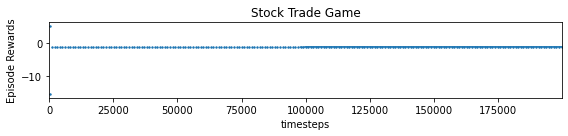

In [5]:
# The noise objects for DDPG
n_actions = env.action_space.shape
action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

model = DDPG('MlpPolicy', env, action_noise=action_noise, verbose=1)
callback = SaveOnBestTrainingRewardCallback(check_freq=2500, log_dir=log_dir)
timesteps = 2e5

model.learn(total_timesteps=int(timesteps), callback=callback)
plot_results([log_dir], timesteps, results_plotter.X_TIMESTEPS, "Stock Trade Game")
plt.show()
model.save("123Automator")

In [6]:
obs = env_raw.reset()
dones = False
while not dones:
    
    action, obs = model.predict(obs)
    print(action)
    obs, rewards, dones, _ = env_raw.step(action)
#     env.render()
env.close()

[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.